# An example of using candex with regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

No temporary folder is provided for candex; this will result in candex saving the files in the same directory as python script
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself
candex will save standard shapefile for candex claculation as:
WRF_Medicine_Hat_target_shapefile.shp


/Users/shg096/Desktop/candex/candex/candex.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target
/Users/shg096/Desktop/candex/candex/candex.py:103: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # centroid lon from target


candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'y', 'x']
candex detects that the longitude varibales has dimensions of:
['y', 'x']
candex detects that the latitude varibales has dimensions of:
['y', 'x']
candex detects case 2 - rotated lat/lon
candex is creating the shapefile from the netCDF file and saving it here:
WRF_Medicine_Hat_source_shapefile.shp
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended
candex saved the expanded shapefile at:
WRF_Medicine_Hat_source_shapefile_expanded.shp


/Users/shg096/Desktop/candex/candex/candex.py:502: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex/candex/candex.py:506: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex/candex/candex.py:601: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex/candex/candex.py:605: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(pairs, columns=pa

Remapping ../data/WRF_Bow_at_MedicinHat/source_nc/WRF_merged_2000-10-01.nc to ../output/2000-10-01-00-00-00.nc
Started at date and time 2021-01-22 23:50:27.893049
Ended   at date and time 2021-01-22 23:50:28.060198


<AxesSubplot:>

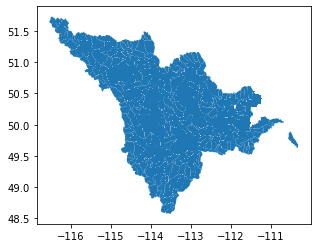

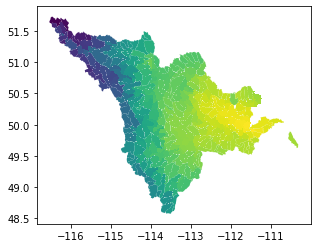

In [7]:
from candex import candex

cndx = candex() # initialize candex object
cndx.name_of_case = 'WRF_Medicine_Hat'
cndx.name_of_target_shp = '../data/ERA5_SSR_at_MedicineHat/target_shp/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files = '../data/WRF_Bow_at_MedicinHat/source_nc/WRF_merged_2000-10-01.nc'
cndx.name_of_var_name = ['T2']
cndx.name_of_var_lon = 'XLONG'
cndx.name_of_var_lat = 'XLAT'
cndx.name_of_var_time = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list          =  ['f4']
cndx.fill_value_list     = ['-9999.00']

# excecute candex!
cndx.run_candex()

# visualize the result
import geopandas as gpd
import xarray as xr
shp = gpd.read_file('../data/ERA5_SSR_at_MedicineHat/target_shp/South_Saskatchewan_MedicineHat.shp')
shp.plot()
ds = xr.open_dataset('../output/2000-10-01-00-00-00.nc')
shp['value'] = ds.T2[1,:]
shp.plot(column= 'value')